In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
csv_dir = '../../data/csv/'
p = pd.read_csv(csv_dir + 'pokemon.csv')

### Pokemon Stats

In [3]:
ps = pd.read_csv(csv_dir + 'pokemon_stats.csv')
s = pd.read_csv(csv_dir + 'stats.csv')

pss = pd.merge(ps, s, left_on = 'stat_id', right_on = 'id')
pss = pss.pivot(index = 'pokemon_id', columns = 'identifier', values = 'base_stat')
pss.reset_index(inplace = True)

p = pd.merge(p, pss, left_on = 'id', right_on = 'pokemon_id')
p.drop('pokemon_id', axis = 1, inplace = True)
p.head(1)

,id,identifier,species_id,height,weight,base_experience,order,is_default,attack,defense,hp,special-attack,special-defense,speed
0,1,bulbasaur,1,7,69,64,1,1,49,49,45,65,65,45


### Format

In [4]:
p.rename(columns = {'identifier': 'name'}, inplace = True)
p.drop([
    'id',
    'species_id',
    'base_experience',
    'order',
    'is_default'
], axis = 1, inplace = True)

### Visualize

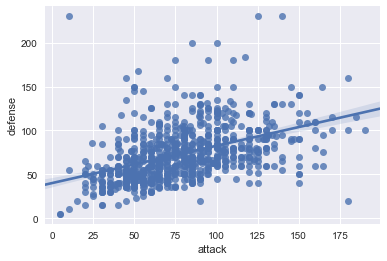

In [8]:
sns.regplot(data = p, x = 'attack', y = 'defense')